1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [17]:
import scipy.optimize as optimize
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack


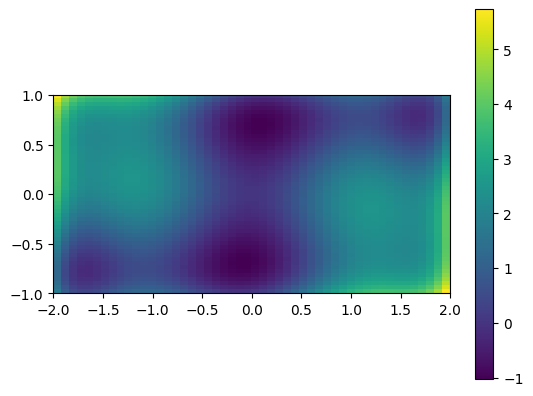

In [18]:
def sixhump(x):
  x1 = x[0]
  x2 = x[1]
  f =  (4 - 2.1*(x1*x1) + (x1*x1*x1*x1)/3.0)*(x1*x1) + x1*x2 + (-4 + 4*(x2*x2))*(x2*x2)
  return f
  
# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()



Text(0.5, 0.92, 'Six-hump Camelback function')

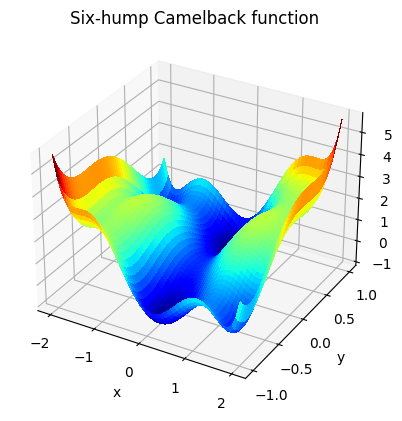

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -1.031628453480323
        x: [-8.984e-02  7.127e-01]
      nit: 11
      jac: [-1.776e-06  1.730e-05]
     nfev: 60
     njev: 20
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: -1.031628453480188
        x: [ 8.984e-02 -7.127e-01]
      nit: 11
      jac: [ 1.776e-06 -1.725e-05]
     nfev: 60
     njev: 20
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


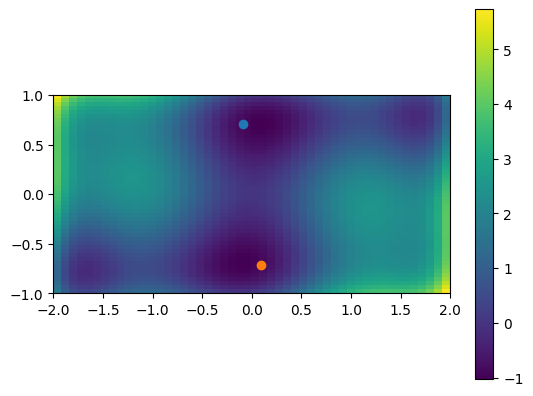

In [20]:
#Find the minimum
x_min1 = optimize.minimize(sixhump, x0=[-2,1], bounds=[(-2,2),(-1,1)], method = 'L-BFGS-B')
x_min2 = optimize.minimize(sixhump, x0=[2,-1], bounds=[(-2,2),(-1,1)], method = 'L-BFGS-B')
print(x_min1,end='\n')
print(x_min2,end='\n')

plt.figure()
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()
# And the minimum that we've found:
plt.scatter(x_min1.x[0], x_min1.x[1])
plt.scatter(x_min2.x[0], x_min2.x[1])
plt.show()

In [21]:
x_min3 = optimize.minimize(sixhump, x0=[0,0], bounds=[(-2,2),(-1,1)], method = 'L-BFGS-B')
print(x_min3,end='\n')

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 4.000e-08 -4.000e-08]
     nfev: 3
     njev: 1
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


### Answers to the questions
- Find the global minima of this function

A : The global minima of this function is at (0.08984238, -0.71265748) and (-0.08984238,  0.71265748) 

- How many global minima are there, and what is the function value at those points?

A : There are 2 global minima, and the function value is -1.031628453480188

- What happens for an initial guess of $(x, y) = (0, 0)$?

A :  Will stuck at the local minima which the function value is 0.0


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

In [22]:

from scipy.integrate import odeint


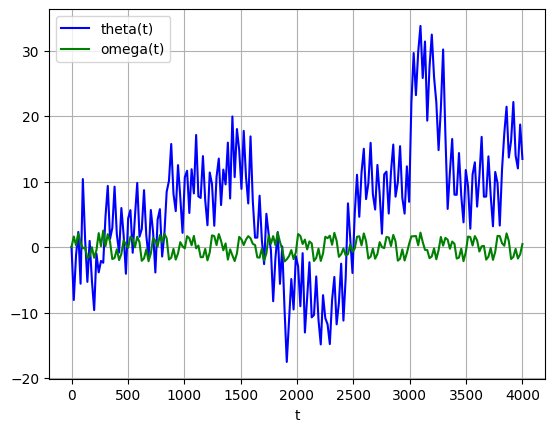

In [23]:
def deriv(y, t, Q, d, Omega):
  theta, omega = y
  dydt = [omega, -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
  return dydt

Q = 2.0
d = 1.5
Omega = 0.65

y0 = [0, 0]
t = np.linspace(0, 4000, 200)

sol = odeint(deriv, y0, t, args=(Q, d, Omega))

# plt.plot(sol[:, 0], sol[:, 1])

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()




### Determine if there is a set of parameters for which the motion is chaotic.

A: When using these values as below, the motion is not chaotic:

- Q = 2.0
- d = 1.5
- Omega = 0.65
- y0 = [0, 0]

Compared with the results above, so we can conclude that 
- Q = 2.0
- d = 1.5
- Omega = 0.65
- y0 = [0, 0]

The motion will be chaotic.


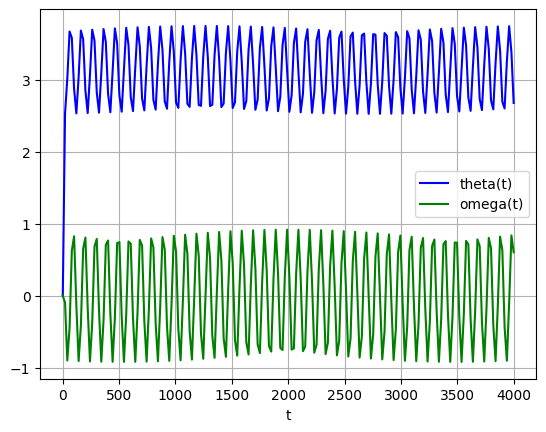

In [24]:

y0 = [0,0]
t = np.linspace(0, 4000, 200)

sol = odeint(deriv, y0, t, args=(0.5, 2.0, 1.5))

plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()

### Non-chaotic motion case

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

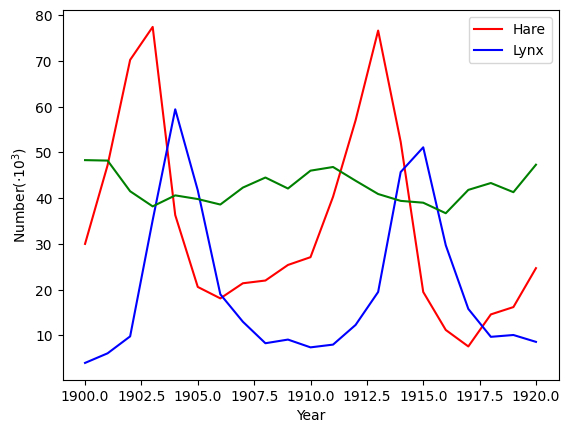

/var/folders/qz/qk6dlk4j0617p8dd29pkz4r80000gn/T/ipykernel_31115/3188132243.py:23: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


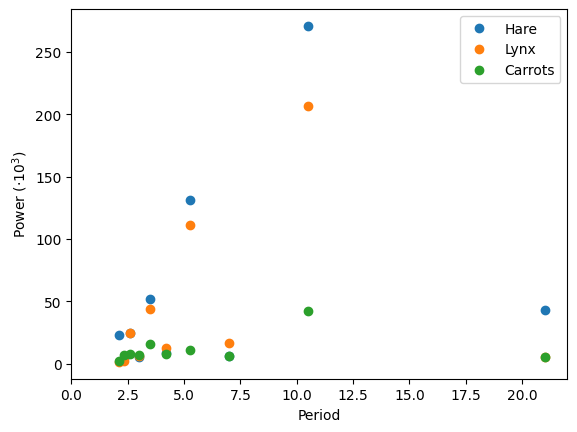

In [36]:
def load_data():
    data = np.loadtxt('data/populations.txt')
    return data

def plot_data(data):
    plt.figure()
    years = data[:, 0]


    populations = data[:, 1:]

    plt.plot(data[:,0], data[:,1]* 1e-3, label='hare', color='r')
    plt.plot(data[:,0], data[:,2]* 1e-3, label='lynx', color='b')
    plt.plot(data[:,0], data[:,3]* 1e-3, label='carrot', color='g')
    labels = ['Hare', 'Lynx']
    plt.xlabel('Year')
    plt.ylabel('Number($\cdot10^3$)')
    plt.legend(labels)
    plt.show()

    ft_populations = fftpack.fft(populations, axis=0)
    frequencies = fftpack.fftfreq(populations.shape[0], years[1] - years[0])
    periods = 1 / frequencies

    plt.figure()
    plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
    plt.xlim(0, 22)
    plt.xlabel('Period')
    plt.ylabel('Power ($\cdot10^3$)')
    labels = ['Hare', 'Lynx','Carrots']
    plt.legend(labels)

    plt.show()


plot_data(load_data())


#### A : The period is around 10 years

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [27]:
from matplotlib.colors import LogNorm
from scipy import fftpack

In [1]:
def load_Image():
    image = plt.imread('/content/moonlanding.png').astype(float)
    #image = image.astype(np.float)
    #print(type(image))
    return image

def plot_Image(image):
    plt.figure()
    plt.imshow(image, plt.cm.gray)
    plt.title('Original image')

#plot_Image(load_Image())

Text(0.5, 1.0, 'Spectrum magnitude')

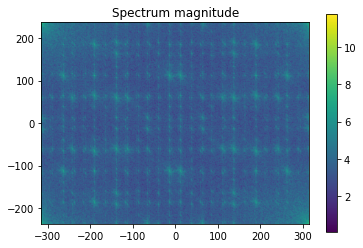

In [ ]:
im_fft = fftpack.fft2(load_Image())
F_magnitude = np.abs(im_fft)
M, N = im_fft.shape


# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.log(1 + F_magnitude), cmap='viridis',
          extent=(-N // 2, N // 2, -M // 2, M // 2))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Spectrum magnitude')

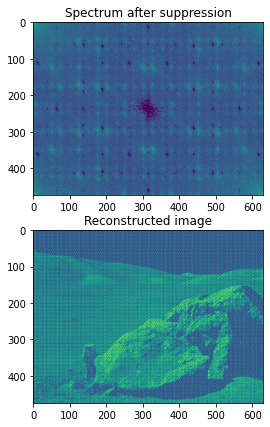

In [ ]:

# Set block around center of spectrum to zero
K = 40
F_magnitude[M // 2 - K: M // 2 + K, N // 2 - K: N // 2 + K] = 0

# Find all peaks higher than the 98th percentile
peaks = F_magnitude < np.percentile(F_magnitude, 98)

# Shift the peaks back to align with the original spectrum
peaks = fftpack.ifftshift(peaks)
#print(peaks) true

# Make a copy of the original (complex) spectrum
F_dim = im_fft.copy()

# Set those peak coefficients to zero
F_dim = F_dim * peaks.astype(int)

# Do the inverse Fourier transform to get back to an image.
# Since we started with a real image, we only look at the real part of
# the output.
image_filtered = np.real(fftpack.ifft2(F_dim))

f, (ax0, ax1) = plt.subplots(2, 1, figsize=(4.8, 7))
ax0.imshow(np.log10(1 + np.abs(F_dim)), cmap='viridis')
ax0.set_title('Spectrum after suppression')

ax1.imshow(image_filtered)
ax1.set_title('Reconstructed image');